# 머신러닝 회귀모델 실습
- Kaggle data : https://www.kaggle.com/mustafaali96/weight-height
- 데이터 컬럼 : Gender, Height, Weight
- 목표(target) : 사람의 키에 따른 몸무게 예측하기
- 학습기(Estimator) : LinearRegression


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 데이터 로딩 및 단위 변경

In [39]:
# read weight-height dataset
data = "datas_ml/weight-height.csv"
wh_df = pd.read_csv(data)

In [40]:
wh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### [문제해결] 컬럼 단위를 우리에게 익숙한 값으로 변경하기
- 키 : inch -> cm, 1inch = 2.54cm 
- 몸무게 : lb(파운트) -> kg, 1lb = 0.4563kg 

#### 방법

In [41]:
# read weight-height dataset
data = "datas_ml/weight-height.csv"
wh_df = pd.read_csv(data)

# 키 변경하기
wh_df["Height"] = wh_df["Height"]  * 2.54

# 몸무게 변경하기
wh_df["Weight"] = wh_df["Weight"] * 0.4563

wh_df.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


In [42]:
wh_df.shape

(10000, 3)

# 데이터 탐색

In [43]:
wh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [44]:
#[문제] 기초 통계량 확인
wh_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.665235
std,9.772721,14.651081
min,137.828359,29.522668
25%,161.304276,61.973777
50%,168.447898,73.561459
75%,175.702625,85.405454
max,200.656806,123.196299


In [45]:
wh_df['Gender'].describe()

count     10000
unique        2
top        Male
freq       5000
Name: Gender, dtype: object

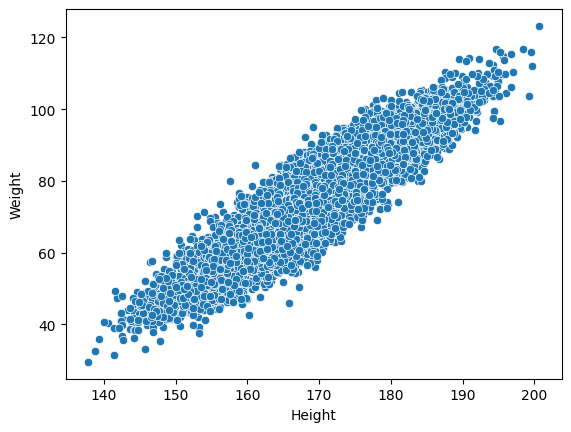

In [46]:
# 키와 몸무게 분포 확인
sns.scatterplot(data=wh_df, x = 'Height', y = 'Weight')
plt.show()

# 1. 키에 따른 몸무게 예측
## 학습, 테스트 데이터 준비
- Feature(x)와 label(y) 데이터 분리 

In [47]:
x = wh_df["Height"] # 입력데이터
y = wh_df["Weight"] # 정답데이터

In [48]:
y[:5]

0    110.376033
1     74.062269
2     97.073652
3    100.405379
4     94.157414
Name: Weight, dtype: float64

## 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나누기
- random_seed 값 주기
- stratify=y 설정은
  - target이 classification인 경우
  - feature가 2개이상 있을 때 사용

In [49]:
# 학습, 테스트 데이터셋으로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [50]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000,), (8000,), (2000,), (2000,))

## 회귀 모델 학습하기
- 선형회귀 : Linear Regression

In [51]:
model_lr = LinearRegression()

In [52]:
model_lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
x_train.shape

(8000,)

In [54]:
# x_train 데이터가 1D 이면 오류 발생함
model_lr.fit(x_train, y_train)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [55]:
x_train.shape

(8000,)

In [56]:
# x는 2차원이어야 함.
x_train_2d = x_train.values.reshape(-1,1)
x_train_2d

array([[158.38424815],
       [150.90929264],
       [163.96639183],
       ...,
       [172.08583788],
       [167.17562084],
       [174.96463993]], shape=(8000, 1))

In [57]:
# 모델 학습
# model_lr.fit(x_train, y_train)  <-- x_train은 2D 여야함.
model_lr.fit(x_train_2d, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
# 회귀선 기울기 확인(W)
model_lr.coef_

array([1.38648312])

In [59]:
# 회귀선의 절편(b)
model_lr.intercept_

np.float64(-160.11720767437617)

#### [tip] feature가 1개인 경우, 학습 및 테스트시 reshape(-1,1)로 차원을 바꿔 주는 이유
-  학습기는 기본적으로 feature 2개 이상의 input이 들어간다고 가정하고 만들어뒀다.(2차원 array)
-  현재 키(height)만 있음.(1차원 vector)

## 학습 모델 테스트

In [60]:
#print(type(x_test))
print("테스트 데이터", x_test.values)
print()
print(x_train_2d)

테스트 데이터 [173.53649028 164.22298414 188.04787828 ... 171.59270539 162.35978704
 158.54282215]

[[158.38424815]
 [150.90929264]
 [163.96639183]
 ...
 [172.08583788]
 [167.17562084]
 [174.96463993]]


In [61]:
# 테스트 데이터에 대한 예측을 수행
# 독립변수 x_test도 2D로 바꿔야 함.
x_test_2d = x_test.values.reshape(-1,1)
x_test_2d

array([[173.53649028],
       [164.22298414],
       [188.04787828],
       ...,
       [171.59270539],
       [162.35978704],
       [158.54282215]], shape=(2000, 1))

In [62]:
# 테스트 데이터를 모델에 입력해서 테스트 함. -> y_hat(예측값)
y_pred = model_lr.predict(x_test_2d)

In [63]:
# 테스트 데이터의 예측값
y_pred

array([ 80.48820744,  67.57518835, 100.608002  , ...,  77.79318249,
        64.99189701,  59.69973961], shape=(2000,))

In [64]:
# 실제값(관측한 테스트의 y값)
y_test

937     94.192251
9355    67.971504
2293    99.389349
192     93.037587
8675    58.119952
          ...    
5624    55.992292
6005    55.485244
987     91.615773
6152    64.285294
2092    74.167774
Name: Weight, Length: 2000, dtype: float64

In [65]:
model_lr.coef_

array([1.38648312])

In [66]:
model_lr.intercept_

np.float64(-160.11720767437617)

## 모델 성능 평가하기

[] 회귀 모델의 성능 평가
- MSE(Mean Squared Error)를 측정하기
- RMSE(Root Mean Squared Error)를 측정하기 <- 평균 오차

In [67]:
y_test[:5]

937     94.192251
9355    67.971504
2293    99.389349
192     93.037587
8675    58.119952
Name: Weight, dtype: float64

In [68]:
# MSE(Mean Squared Error)
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

# 결과는 도메인마다 다름

MSE : 31.729201319729608
RMSE : 5.632867948010996


## ML 모델 일반화

### [문제해결] 내 몸무게 예측해보기
- [힌트] x_train 또는 x_test와 같은 shape으로 입력

키 165cm -> 몸무게 ?  : [[165]]
- 방법1 :
<pre>
    lr.predict([[165]])
</pre>
- 방법2:
<pre>
    y_pred2 = lr.predict(np.array([177,185]).reshape(-1,1))
    y_pred2
</pre>
- 방법3:
<pre>
my_height1 = pd.Series(172)
type(my_height1)
model_lr.predict(my_height1.values.reshape(-1,1))    
</pre>

### [문제해결] 내 키와 내 가족 한사람 더추가 해서 예측해보기
- [힌트] x와 같은 shape으로 입력

In [69]:
a = model_lr.coef_
b = model_lr.intercept_
# y_pred = a * x + b
y = a * 165 + b
y

array([68.65250773])

In [70]:
my_data = np.array([165, 174]).reshape(-1, 1)
y_pred2 = model_lr.predict(my_data)
y_pred2

array([68.65250773, 81.13085584])

## 예측 결과 시각화

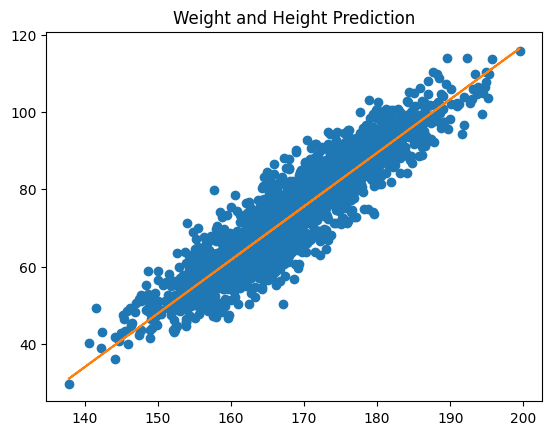

In [71]:
plt.plot(x_test, y_test, 'o')
plt.plot(x_test, y_pred)
plt.title('Weight and Height Prediction')
plt.show()

# 키와 성별에 따른 몸무게 예측하기
- feature 갯수 2개로 학습하기
- Gender, height 데이터로 linear regression 모델 만들기
- Gender는 범주형 데이터임 : One Hot Encoding으로 변환하기

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 데이터 로딩 및 가공

In [73]:
# read weight-height dataset
data = "datas_ml/weight-height.csv"
gwh_df = pd.read_csv(data)
gwh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [74]:
# 인치, 파운드 -> cm, kg으로 변환
gwh_df["Height"] = gwh_df["Height"] * 2.54
gwh_df["Weight"] = gwh_df["Weight"] * 0.4563
# read weight-height dataset
gwh_df.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


<Figure size 1000x600 with 0 Axes>

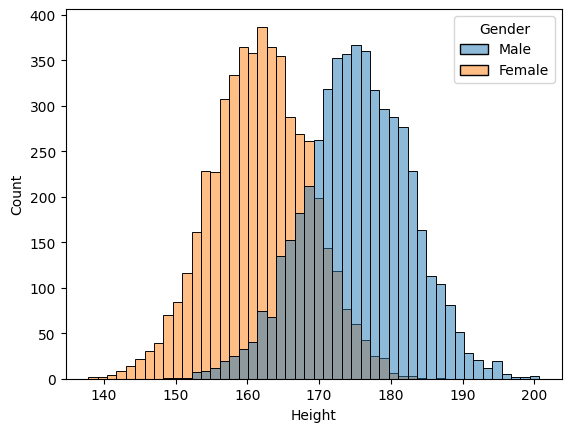

<Figure size 1000x600 with 0 Axes>

In [75]:
# feature distribution
sns.histplot(data=gwh_df, x="Height", hue="Gender")
plt.figure(figsize=(10,6))

## ML을 위한 feature Engineering
- 범주형 데이터 숫자로 변환 : One Hot Encoding

In [76]:
gwh_df['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

In [77]:
# Gender 컬럼을 숫자로 변환(레이블 인코딩: 문자형 데이터 -> 숫자형 데이터로 변환)
gwh_df['Gender'] = gwh_df['Gender'].map({"Male": 0, "Female": 1})
gwh_df.head()

,Gender,Height,Weight
0,0,187.571423,110.376033
1,0,174.706036,74.062269
2,0,188.239668,97.073652
3,0,182.196685,100.405379
4,0,177.499761,94.157414


## 학습, 테스트 데이터 준비

In [78]:
# X = Gender, Height
X = gwh_df.drop(columns='Weight')

# y = Weight
y = gwh_df['Weight']

In [79]:
X.head()

,Gender,Height
0,0,187.571423
1,0,174.706036
2,0,188.239668
3,0,182.196685
4,0,177.499761


In [80]:
# [문제] train data / test 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
X_train

,Gender,Height
9254,1,155.934775
1561,0,189.731998
1670,0,174.009850
6087,1,167.125690
6669,1,170.590986
...,...,...
5734,1,160.908969
5191,1,149.508528
5390,1,163.386531
860,0,175.449210


## 회귀 모델 학습

In [82]:
# 학습모델 객체생성, 학습, 테스트
model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 테스트 및 성능 평가

In [83]:
y_pred = model_lr2.predict(X_test)
y_pred

array([75.55642225, 84.77185534, 78.14549722, ..., 57.84501902,
       79.97209066, 48.15240468], shape=(2000,))

In [84]:
X_test.columns

Index(['Gender', 'Height'], dtype='object')

In [ ]:
# model_lr2의 회귀계수와 절편 확인
model_lr2.coef_, model_lr2.intercept_

(array([-8.82812893,  1.07304895]), np.float64(-102.82554612386367))

### [문제해결] MSE, RMSE 구하기

In [85]:
# MSE(Mean Squared Error)를 측정하기
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

# 결과는 도메인마다 다름

MSE : 21.080039418120673
RMSE : 4.591300405998356


In [86]:
# R²(결정계수) 측정하기, 모델의 설명력
# R²(결정계수) : 모델이 타깃 값의 변동성을 얼마나 설명하는지 나타내는 지표
# 1.0에 가까울수록: 모델 설명력이 높음
# 0에 가까울수록: 평균값 예측하는 수준
# 음수(negative): 평균값보다도 못한 모델 → 모델 개선 필요
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.9033321846361925


## ML 모델 일반화
### [문제해결] 키와, 성별 정보로 일반 데이터를 구성하여 예측하기

In [87]:
my_test = np.array([[1, 165], [0, 178]])
my_test

array([[  1, 165],
       [  0, 178]])

In [88]:
model_lr2.predict(my_test)

c:\Users\Admin\miniconda3\envs\eda_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65.39940251, 88.17716785])

## 예측 결과 시각화

In [89]:
X_test[:5]

,Gender,Height
6252,1,174.465570
4684,0,174.826508
1731,0,168.651246
4742,0,182.700524
4521,0,170.288974


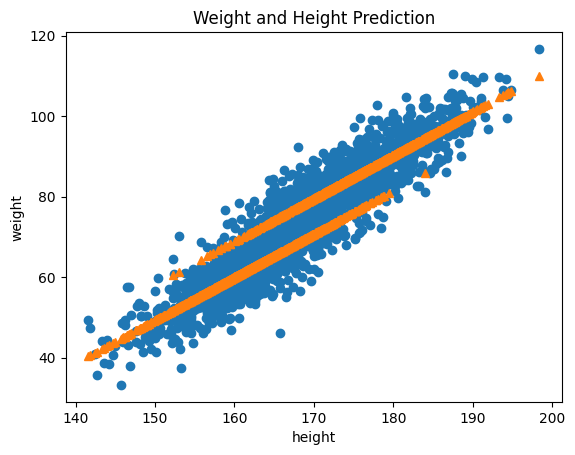

In [90]:
# 테스트 데이터(X)에 따른 실제 몸무게(y)와 예측 데이터(y^) 그래프 그리기
plt.plot(X_test.loc[:,'Height'], y_test, 'o')  # 실제값 표시
plt.plot(X_test.loc[:,'Height'], y_pred, '^')  # 예측값 표시
plt.title('Weight and Height Prediction')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()